<a href="https://colab.research.google.com/github/pskaranth/thelearningcurve/blob/master/Classification/KNN/KNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Susbset of MNIST data set used below was obtained from UCSD micromasters course by edx
# Nearest neighbor for handwritten digit recognition

In this notebook we will build a classifier that takes an image of a handwritten digit and outputs a label 0-9. We will look at a particularly simple strategy for this problem known as the **nearest neighbor classifier**.

To run this notebook you should have the following Python packages installed:
* `numpy`
* `matplotlib`
* `sklearn`

## 1. The MNIST dataset

`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The original training set contains 60,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

In [3]:
# Clone the entire repo.
!git clone -l -s git://github.com/pskaranth/thelearningcurve.git cloned-repo
%cd cloned-repo
!ls

fatal: destination path 'cloned-repo' already exists and is not an empty directory.
/content/cloned-repo
Classification	README.md


In [ ]:
!ls

Classification	README.md


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import time
import os

name = 'train_data.npy'
dirs= 'Classification/KNN/MNIST/'

path_to_use = os.path.join(dirs, name)

# train_data = np.load('Classification/KNN/MNIST/train_data.npy')
## Load the training set
train_data = np.load(path_to_use)
train_labels = np.load('Classification/KNN/MNIST/train_labels.npy')
# ## Load the testing set
test_data = np.load('Classification/KNN/MNIST/test_data.npy')
test_labels = np.load('Classification/KNN/MNIST/test_labels.npy')

In [ ]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

('Training dataset dimensions: ', (7500, 784))
('Number of training labels: ', 7500)
('Testing dataset dimensions: ', (1000, 784))
('Number of testing labels: ', 1000)


##2. Displaying the image of data point below.


In [ ]:
def disp_image(x):
  plt.imshow(x.reshape(28,28))
  plt.show()

8


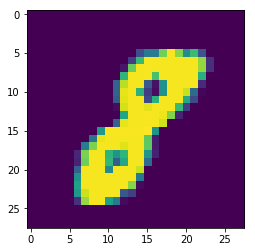

None


In [ ]:
print(train_labels[2,])
print(disp_image(train_data[2,]))

In [ ]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Test set distribution:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 3. Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Often we omit the square root, and simply compute _squared Euclidean distance_:
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have $\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

Now we just need to be able to compute squared Euclidean distance. The following function does so.

In [39]:
def euclid_dist(x,y):
  return np.sum(np.square(x-y))

## 4. Computing nearest neighbors

Now that we have a distance function defined, we can now turn to nearest neighbor classification. 

In [126]:
def NN_class(test_ip):
  distances = []
  for i in range(len(train_labels)):    
    distances.append(euclid_dist(test_ip,train_data[i,]))
  min = np.argmin(distances)
  # print(min)
  # print("Image of the predicted label using nearest neighbour") # comment when you are running for the entire data set.
  # disp_image(train_data[min,])
  return train_labels[min]

('NN class ', 5)
('True label: ', 5)
Image of the true label


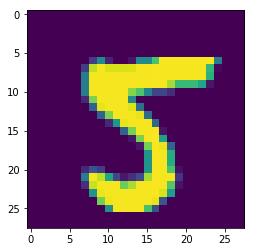

None


In [ ]:
pred = NN_class(test_data[3,])
print("NN class ",pred)
print("True label: ", test_labels[3])
print("Image of the true label")
print(disp_image(test_data[3,]))

In [169]:
print(NN_class(test_data[6,]))

0


## 6. Processing the full test set

Now let's apply our nearest neighbor classifier over the full data set. 

Note that to classify each test point, our code takes a full pass over each of the 7500 training examples. We also find the error rate in prediction.
Error rate = total number of errors / total number of units of test labels

In [ ]:
pred_full = []
for i in range(len(test_labels)):
  pred_full.append(NN_class(test_data[i,]))
error = np.not_equal(pred_full,test_labels)

In [ ]:
print(error[2])
error_rate = float(np.sum(error))/len(test_labels)
print(error_rate)

False
0.046


In [159]:
dist = []
dist.append(1)
dist.append(5)
dist.append(2)
dist.append(4)
dist.append(10)
print(type(dist))
dist.sort()
print(dist)
print(dist[-2:])
print(dist[:2])

for j in range(len(dist[:2])):
  print(dist[j])
np.argmin(dist)

for i in dist:
  print('i in dist', i)

<type 'list'>
[1, 2, 4, 5, 10]
[5, 10]
[1, 2]
1
2
('i in dist', 1)
('i in dist', 2)
('i in dist', 4)
('i in dist', 5)
('i in dist', 10)


## Implementation of K Nearest Neighbours

In [177]:
# a = [1,2,3,4,3,3,4,2,2,2,2]
# freq_count = Counter(a) 
# freq_count.most_common(1)[0][0]

2

In [178]:
from collections import Counter
def most_freq(labels):
   ''' This method returns the most frequently occuring label '''
  # print(labels)
  freq_count = Counter(labels) 
  return freq_count.most_common(1)[0][0]

In [179]:
def KNN_predict(test_ip,k):
 '''This method is used to predict the value from k nearest neighbour '''
  distances = []
  for i in range(len(test_labels)):    
    distances.append(euclid_dist(test_ip,train_data[i,]))
  # print(np.argsort(distances))
  # print(train_labels[np.argsort(distances),][0])
  # print(train_labels[np.argsort(distances),])
  
  l= []
  for j in range(k):   
    # print(train_labels[np.argsort(distances),])
    l.append(train_labels[np.argsort(distances),][j]) 
  return most_freq(l)    

In [172]:
KNN_predict(test_data[6,],3)

0

##7. Using the KNN classification from sklearn

In [8]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,10,2): 
  model = KNeighborsClassifier(n_neighbors=k) 

 # Train the model using the training sets
  model.fit(train_data,train_labels)

  #Predict Output
  predicted= model.predict(test_data[3,].reshape(1,-1)) 
  score = model.score(test_data,test_labels)  
  print("k=%d, error_rate=%.3f, accuracy=%.2f%%" % (k, 1-score, score * 100))

k=1 ,error_rate=0.046, accuracy=95.40%
k=3 ,error_rate=0.052, accuracy=94.80%
k=5 ,error_rate=0.049, accuracy=95.10%
k=7 ,error_rate=0.057, accuracy=94.30%
k=9 ,error_rate=0.058, accuracy=94.20%
